In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


# Import libraries

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%capture
!pip install category_encoders
!pip install association-metrics

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data Preprocessing

In [5]:
data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

In [14]:
data.replace({' ': np.NaN}, inplace=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [17]:
data.sort_values("TotalSpent").tail(9)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [18]:
data.TotalSpent = data.TotalSpent.astype(float)
data.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)

In [19]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086,0.159409,0.262022
std,24.550326,30.176464,2267.371263,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.587500,0.000000,0.000000
50%,29.000000,70.400000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [20]:
data.describe(include='object')

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [21]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4977
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

**Как видно по ячейке ниже, данные не являются сбалансированными**

In [22]:
data['Churn'].value_counts() / len(data)

Churn
0    0.737978
1    0.262022
Name: count, dtype: float64

<Axes: >

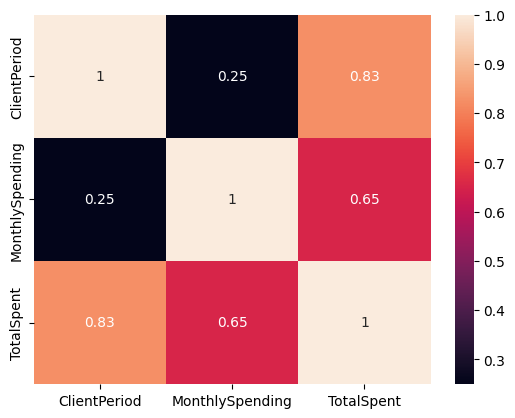

In [23]:
sb.heatmap(data[num_cols].corr(), annot = True)

In [24]:
X = data.drop('Churn', axis=1)
y = data.Churn

In [25]:
print(X['HasMultiplePhoneNumbers'].value_counts())
X.replace({'No phone service': 'No'}, inplace=True)

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64


In [26]:
X['HasInternetService'].value_counts()

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

In [27]:
data.groupby(['HasInternetService', 'Churn']).agg({'Churn': 'count'})

Churn
HasInternetService Churn       
DSL                0       1458
                   1        342
Fiber optic        0       1381
                   1        960
No                 0       1059
                   1         82

**У практически всех пользователей с No internet service значение оттока - 0, причем большинство также уходит от DSL провайдера**

In [28]:
data.groupby(['Sex', 'Churn']).agg({'Churn': 'count'})

Churn
Sex    Churn       
Female 0       1929
       1        698
Male   0       1969
       1        686

**С полом, что ожидаемо, никакой явной зависимости нет**

In [29]:
X['HasOnlineSecurityService'].value_counts()
X['HasOnlineSecurityService'] = X['HasOnlineSecurityService'].replace({'No internet service': 'No'})

X['HasOnlineBackup'].unique()
X['HasOnlineBackup'] = X['HasOnlineBackup'].replace({'No internet service': 'No'})

X.replace({'No internet service': 'No'}, inplace=True)

In [30]:
data.groupby(['HasContractPhone', 'Churn']).agg({'Churn': 'count'})

Churn
HasContractPhone Churn       
Month-to-month   0       1689
                 1       1231
One year         0        962
                 1        120
Two year         0       1247
                 1         33

**Наличие контактного номера также очень важно. Чем раньше пользователь оставил свои контакты, тем больше верояность того, что он там останется**

In [31]:
X['HasContractPhone'].unique()

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [32]:
import association_metrics as am

XC = X.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
Sex,1.000000,0.002780,0.014605,0.007771,0.003035,0.005959,0.012985,0.007417,0.002257,0.016317,0.015094,0.008897,0.015061,0.015698,0.015483
HasPartner,0.002780,1.000000,0.442530,0.001508,0.134243,0.006321,0.143668,0.134424,0.153821,0.121847,0.117244,0.118002,0.293538,0.005293,0.161243
HasChild,0.014605,0.442530,1.000000,0.010475,0.030892,0.191908,0.080863,0.016453,0.003817,0.057694,0.023557,0.034888,0.239425,0.100777,0.146767
HasPhoneService,0.007771,0.001508,0.010475,1.000000,0.284968,0.460095,0.098260,0.044911,0.066884,0.103995,0.024230,0.025785,0.005086,0.021362,0.017092
HasMultiplePhoneNumbers,0.003035,0.134243,0.030892,0.284968,1.000000,0.362584,0.106104,0.203648,0.202934,0.091267,0.253287,0.255497,0.115314,0.159193,0.227935
HasInternetService,0.005959,0.006321,0.191908,0.460095,0.362584,1.000000,0.397749,0.379016,0.381243,0.395843,0.448306,0.444489,0.205724,0.370744,0.303215
HasOnlineSecurityService,0.012985,0.143668,0.080863,0.098260,0.106104,0.397749,1.000000,0.287962,0.281829,0.350233,0.170502,0.188022,0.256111,0.007880,0.174824
HasOnlineBackup,0.007417,0.134424,0.016453,0.044911,0.203648,0.379016,0.287962,1.000000,0.304005,0.288625,0.282359,0.283408,0.172144,0.126721,0.193059
HasDeviceProtection,0.002257,0.153821,0.003817,0.066884,0.202934,0.381243,0.281829,0.304005,1.000000,0.334200,0.393989,0.407060,0.232445,0.102178,0.204915
HasTechSupportAccess,0.016317,0.121847,0.057694,0.103995,0.091267,0.395843,0.350233,0.288625,0.334200,1.000000,0.278862,0.286757,0.301659,0.033950,0.181206


ClientPeriod


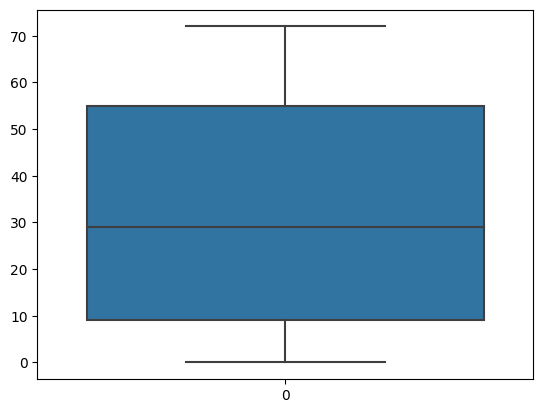

MonthlySpending


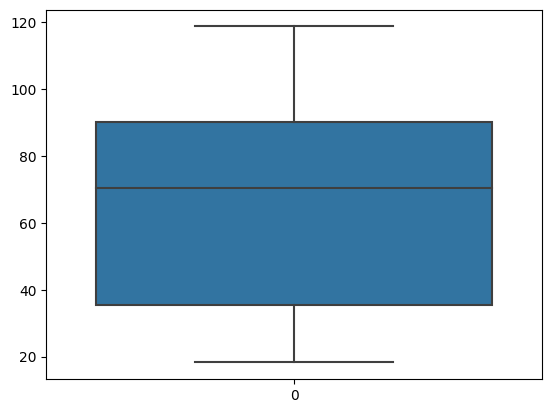

TotalSpent


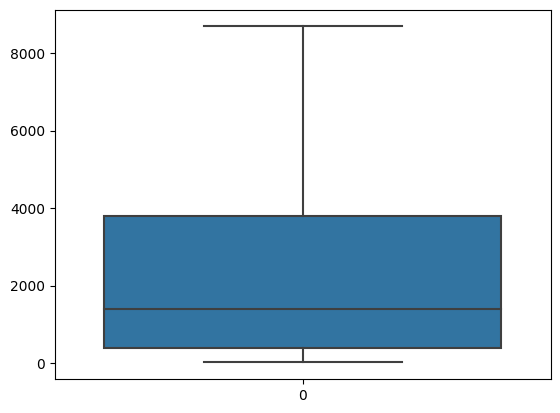

IsSeniorCitizen


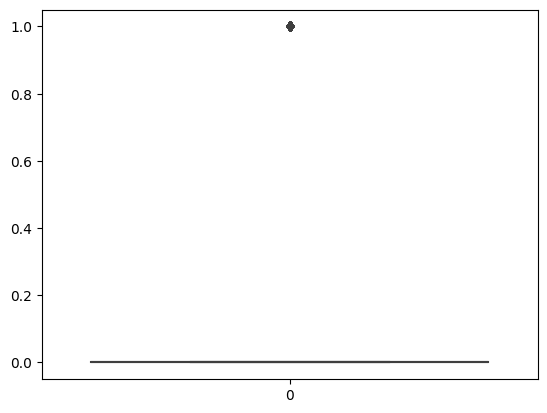

In [34]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

for col in num_cols:
    print(col)
    sb.boxplot(X[col])
    plt.show();

**Выбросы в глаза не бросаются, вероятно, их нет**

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
def binary_change(s):
    return s.replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})

In [37]:
binary_feauters = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 
                   'HasMultiplePhoneNumbers', 'HasOnlineSecurityService', 'HasOnlineBackup',
                   'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'IsBillingPaperless']


# from category_encoders.count import CountEncoder
# encoder = CountEncoder(cols=binary_feauters)
# X_train = encoder.fit_transform(X_train, y_train,)
# X_test = encoder.transform(X_test)
X_train = X_train.apply(binary_change)
X_test = X_test.apply(binary_change)

In [40]:
# def label_encoder(s):
#     return s.replace({
#     "DSL": 1,
#     "Fiber optic": 2,
#     "Month-to-month": 0,
#     "One year": 1,
#     "Two year": 2,
#     "Credit card (automatic)": 0,
#     "Bank transfer (automatic)": 1,
#     "Mailed check": 2,
#     "Electronic check": 3,})

In [42]:
from category_encoders.target_encoder import TargetEncoder


encoder2 = TargetEncoder(cols=['HasInternetService', 'HasContractPhone', 'PaymentMethod'])
X_train = encoder2.fit_transform(X_train, y_train)
X_test = encoder2.transform(X_test)

In [43]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4447,55,113.60,6292.70,0,1,1,0,1,1,2,0,1,1,1,1,1,2,1,3
4899,46,81.00,3846.35,0,0,1,1,1,0,1,1,0,1,1,1,1,2,0,2
3029,30,94.05,2866.45,0,0,1,0,1,1,2,0,0,0,0,1,1,0,1,0
755,1,79.70,79.70,1,0,0,0,1,0,2,0,0,0,0,0,1,0,1,3
518,1,80.00,80.00,0,0,1,1,1,0,2,0,0,0,0,0,1,0,0,3


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score


model = LogisticRegression()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1186
           1       0.61      0.52      0.56       399

    accuracy                           0.79      1585
   macro avg       0.73      0.70      0.71      1585
weighted avg       0.79      0.79      0.79      1585



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
pred_logreg = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

In [46]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train, y_train)
X_test_scaler = scaler.transform(X_test)

In [47]:
X_train_scaler = pd.DataFrame(X_train_scaler)
X_test_scaler = pd.DataFrame(X_test_scaler)
X_train_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.916309,1.623874,1.761107,-0.998648,2.278734,1.016088,-0.667285,0.343904,1.163305,0.995708,-0.642407,1.399989,1.363540,1.547533,1.273572,1.253368,1.560859,0.823046,1.143864
1,0.551118,0.540629,0.685471,-0.998648,-0.438840,1.016088,1.498609,0.343904,-0.859620,-0.291852,1.556646,-0.714292,1.363540,1.547533,1.273572,1.253368,1.560859,-1.214999,0.270673
2,-0.098111,0.974259,0.254619,-0.998648,-0.438840,1.016088,-0.667285,0.343904,1.163305,0.995708,-0.642407,-0.714292,-0.733385,-0.646190,1.273572,1.253368,-0.821674,0.823046,-1.475710
3,-1.274839,0.497432,-0.970688,1.001353,-0.438840,-0.984166,-0.667285,0.343904,-0.859620,0.995708,-0.642407,-0.714292,-0.733385,-0.646190,-0.785193,1.253368,-0.821674,0.823046,1.143864
4,-1.274839,0.507401,-0.970556,-0.998648,-0.438840,1.016088,1.498609,0.343904,-0.859620,0.995708,-0.642407,-0.714292,-0.733385,-0.646190,-0.785193,1.253368,-0.821674,-1.214999,1.143864


In [48]:
model.fit(X_train_scaler, y_train)
print(classification_report(y_test, model.predict(X_test_scaler)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1186
           1       0.60      0.51      0.55       399

    accuracy                           0.79      1585
   macro avg       0.72      0.70      0.71      1585
weighted avg       0.78      0.79      0.78      1585



In [49]:
pred_logreg_scaled = roc_auc_score(y_test, model.predict_proba(X_test_scaler)[:,1])

In [50]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=1100, random_state=42)
model_rf.fit(X_train, y_train)
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1186
           1       0.63      0.46      0.53       399

    accuracy                           0.79      1585
   macro avg       0.73      0.68      0.70      1585
weighted avg       0.78      0.79      0.78      1585



In [51]:
pred_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])

In [52]:
pred_rf

0.8318836720807076

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'n_estimators': np.arange(100, 2000, 100),
#     'max_depth': np.arange(3, 15),
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2'],
# # 5
# #     'criterion': ['gini', 'entropy']
# }


# clf = GridSearchCV(model_rf, parameters, cv=3, n_jobs=-1) 
# clf.fit(X_train, y_train)
# clf.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 1100}

In [53]:
res = {'Algorthm':['LogReg', 'LogReg Scaled', 'Random Forest'],
        'ROC_AUC':[pred_logreg, pred_logreg_scaled, pred_rf]}
data_result = pd.DataFrame(res).sort_values(by='ROC_AUC', ascending=False)
data_result

,Algorthm,ROC_AUC
0,LogReg,0.833612
1,LogReg Scaled,0.831932
2,Random Forest,0.831884


In [ ]:
X_test_kag = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')

X_test_kag.replace({' ': np.NaN}, inplace=True)
X_test_kag.TotalSpent = data.TotalSpent.astype(float)
X_test_kag.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)
X_test_kag.isna().sum()

In [ ]:
X_test_kag.replace({'No phone service': 'No'}, inplace=True)
X_test_kag['HasOnlineSecurityService'] = X_test_kag['HasOnlineSecurityService'].replace({'No internet service': 'No'})
X_test_kag['HasOnlineBackup'] = X_test_kag['HasOnlineBackup'].replace({'No internet service': 'No'})
X_test_kag.replace({'No internet service': 'No'}, inplace=True)
X_test_kag

In [ ]:
X_test_kag = X_test_kag.apply(binary_change)
X_test_kag = encoder2.transform(X_test_kag)
X_test_kag

In [ ]:
X_test_kag_scaler = scaler.transform(X_test_kag)
X_test_kag_scaler

In [ ]:
X_test_kag_scaler = pd.DataFrame(X_test_kag_scaler)

In [ ]:
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = model_rf.predict_proba(X_test_kag)[:,1]
submission.to_csv('my_submission_rf1.csv', index=False)

In [ ]:
submission['Churn'] = 0.7 * model_rf.predict_proba(X_test_kag)[:,1] + 0.3 * model.predict_proba(X_test_kag_scaler)[:,1]
submission.to_csv('my_submission_weights3.csv', index=False)

Попробовать CatBoost на неизмененных данных, затем на обработанных до изменения катеориальных в числовые

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

model_cb = CatBoostClassifier(verbose=0, cat_features=cat_cols.tolist(), random_state=42, **trial_catboost.params)
print(f"ROC_AUC: {cross_val_score(model_cb, X, y, cv = 3, scoring = 'roc_auc').mean()}")
model_cb.fit(X,y)

In [ ]:
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = model_cb.predict_proba(X_test_kag)[:,1]
submission.to_csv('my_submission_cb1.csv', index=False)

In [ ]:
# import optuna

# def objective(trial):
#     param = {

#         "depth":trial.suggest_int("depth",2,10),
#         'iterations':trial.suggest_int('iterations',100,2000),
#         'l2_leaf_reg':trial.suggest_int('l2_leaf_reg',2,10),
#         'learning_rate':trial.suggest_float('learning_rate', 0.001, 0.01),
#         'random_strength': trial.suggest_int('random_strength', 0, 10)

#     }

#     estimator = CatBoostClassifier(**param, verbose=0, cat_features=cat_cols.tolist(), random_state=42)

#     score = cross_val_score(estimator, X, y, cv = 3, scoring = 'roc_auc',verbose = 2).mean()
#     return score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)
# trial_catboost = study.best_trial

In [ ]:
print("Catboost")
print(f"ROC-AUC: {trial_catboost.value}")
print(f"Best params: {trial_catboost.params}")

In [ ]:
submission['Churn'] = 0.7 * rf_pred + 0.3 * cb_pred
submission.to_csv('my_submission_weights4.csv', index=False)